In [2]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

Data Loading

In [ ]:
df = pd.read_excel(r"path to PCOS_data_without_infertility.xlsx")

EDA

In [4]:
df.head()

,Sl. No,Patient File No.,PCOS,Age,Weight,Height,BMI,Blood Group,Pulse rate,RR,...,Fast food,Reg.Exercise,BP _Systolic,BP _Diastolic,Follicle No. (L),Follicle No. (R),Avg. F size (L),Avg. F size,Endometrium,Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [5]:
pd.set_option('display.max_columns', 50) 

# Now, your isnull().sum() will show all columns


In [6]:
print(df.isnull().sum().to_string())

Sl. No                  0
Patient File No.        0
PCOS                    0
Age                     0
Weight                  0
Height                  0
BMI                   299
Blood Group             0
Pulse rate              0
RR                      0
Hb                      0
Cycle                   0
Cycle length            0
Marraige Status         1
Pregnant                0
No. of abortions        0
beta-HCG(mIU/mL)        0
beta-HCG(mIU/mL).1      0
FSH                     0
LH                      0
FSH/LH                532
Hip                     0
Waist                   0
Waist:Hip             532
TSH                     0
AMH                     0
PRL                     0
Vit D3                  0
PRG                     0
RBS                     0
Weight gain             0
hair growth             0
Skin darkening          0
Hair loss               0
Pimples                 0
Fast food               1
Reg.Exercise            0
BP _Systolic            0
BP _Diastoli

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl. No              541 non-null    int64  
 1   Patient File No.    541 non-null    int64  
 2   PCOS                541 non-null    int64  
 3   Age                 541 non-null    int64  
 4   Weight              541 non-null    float64
 5   Height              541 non-null    float64
 6   BMI                 242 non-null    float64
 7   Blood Group         541 non-null    int64  
 8   Pulse rate          541 non-null    int64  
 9   RR                  541 non-null    int64  
 10  Hb                  541 non-null    float64
 11  Cycle               541 non-null    int64  
 12  Cycle length        541 non-null    int64  
 13  Marraige Status     540 non-null    float64
 14  Pregnant            541 non-null    int64  
 15  No. of abortions    541 non-null    int64  
 16  beta-HCG

In [8]:
df.shape

(541, 45)

Data Cleaning

In [9]:
#df = df.drop(['Unnamed: 44'], axis = 1)
#df = df.drop(['Sl. No'], axis = 1) 
df = df.drop(['Patient File No.'], axis = 1) 

In [10]:
df.head()

,Sl. No,PCOS,Age,Weight,Height,BMI,Blood Group,Pulse rate,RR,Hb,Cycle,Cycle length,Marraige Status,Pregnant,No. of abortions,beta-HCG(mIU/mL),beta-HCG(mIU/mL).1,FSH,LH,FSH/LH,Hip,Waist,Waist:Hip,TSH,AMH,PRL,Vit D3,PRG,RBS,Weight gain,hair growth,Skin darkening,Hair loss,Pimples,Fast food,Reg.Exercise,BP _Systolic,BP _Diastolic,Follicle No. (L),Follicle No. (R),Avg. F size (L),Avg. F size,Endometrium,Unnamed: 44
0,1,0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,NaN,36,30,NaN,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,0,36,65.0,161.5,NaN,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,NaN,38,32,NaN,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,1,33,68.8,165.0,NaN,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,NaN,40,36,NaN,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,0,37,65.0,148.0,NaN,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,NaN,42,36,NaN,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,0,25,52.0,161.0,NaN,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,NaN,37,30,NaN,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [11]:
df.isnull().sum()

Sl. No                  0
PCOS                    0
Age                     0
Weight                  0
Height                  0
BMI                   299
Blood Group             0
Pulse rate              0
RR                      0
Hb                      0
Cycle                   0
Cycle length            0
Marraige Status         1
Pregnant                0
No. of abortions        0
beta-HCG(mIU/mL)        0
beta-HCG(mIU/mL).1      0
FSH                     0
LH                      0
FSH/LH                532
Hip                     0
Waist                   0
Waist:Hip             532
TSH                     0
AMH                     0
PRL                     0
Vit D3                  0
PRG                     0
RBS                     0
Weight gain             0
hair growth             0
Skin darkening          0
Hair loss               0
Pimples                 0
Fast food               1
Reg.Exercise            0
BP _Systolic            0
BP _Diastolic           0
Follicle No.

In [12]:
df['Height (m)'] = df['Height'] / 100
df.loc[:, 'BMI'] = df['Weight'] / (df['Height (m)']**2)
df.loc[:, 'FSH/LH'] = df['FSH']/df['LH']
df.loc[:, 'Waist:Hip'] = df['Waist']/df['Hip']

In [13]:
df = df.drop(['Height (m)'], axis = 1)
df = df.drop(['Sl. No', 'Age', 'Blood Group'], axis = 1)
df = df.drop(['Unnamed: 44'], axis = 1)

In [14]:
print(df.columns)

Index(['PCOS', 'Weight', 'Height', 'BMI', 'Pulse rate', 'RR', 'Hb', 'Cycle',
       'Cycle length', 'Marraige Status', 'Pregnant', 'No. of abortions',
       'beta-HCG(mIU/mL)', 'beta-HCG(mIU/mL).1', 'FSH', 'LH', 'FSH/LH', 'Hip',
       'Waist', 'Waist:Hip', 'TSH', 'AMH', 'PRL', 'Vit D3', 'PRG', 'RBS',
       'Weight gain', 'hair growth', 'Skin darkening', 'Hair loss', 'Pimples',
       'Fast food', 'Reg.Exercise', 'BP _Systolic', 'BP _Diastolic',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L)',
       'Avg. F size', 'Endometrium'],
      dtype='object')


In [15]:
df.isnull().sum()

PCOS                  0
Weight                0
Height                0
BMI                   0
Pulse rate            0
RR                    0
Hb                    0
Cycle                 0
Cycle length          0
Marraige Status       1
Pregnant              0
No. of abortions      0
beta-HCG(mIU/mL)      0
beta-HCG(mIU/mL).1    0
FSH                   0
LH                    0
FSH/LH                0
Hip                   0
Waist                 0
Waist:Hip             0
TSH                   0
AMH                   0
PRL                   0
Vit D3                0
PRG                   0
RBS                   0
Weight gain           0
hair growth           0
Skin darkening        0
Hair loss             0
Pimples               0
Fast food             1
Reg.Exercise          0
BP _Systolic          0
BP _Diastolic         0
Follicle No. (L)      0
Follicle No. (R)      0
Avg. F size (L)       0
Avg. F size           0
Endometrium           0
dtype: int64

In [16]:
df =df.dropna()

In [17]:
df.isnull().sum()

PCOS                  0
Weight                0
Height                0
BMI                   0
Pulse rate            0
RR                    0
Hb                    0
Cycle                 0
Cycle length          0
Marraige Status       0
Pregnant              0
No. of abortions      0
beta-HCG(mIU/mL)      0
beta-HCG(mIU/mL).1    0
FSH                   0
LH                    0
FSH/LH                0
Hip                   0
Waist                 0
Waist:Hip             0
TSH                   0
AMH                   0
PRL                   0
Vit D3                0
PRG                   0
RBS                   0
Weight gain           0
hair growth           0
Skin darkening        0
Hair loss             0
Pimples               0
Fast food             0
Reg.Exercise          0
BP _Systolic          0
BP _Diastolic         0
Follicle No. (L)      0
Follicle No. (R)      0
Avg. F size (L)       0
Avg. F size           0
Endometrium           0
dtype: int64

Feature Engineering

In [18]:
# Follicle characteristics
df['Total_Follicles'] = df['Follicle No. (L)'] + df['Follicle No. (R)']
df['Follicle_Asymmetry'] = abs(df['Follicle No. (L)'] - df['Follicle No. (R)'])

In [19]:
# Symptom combinations
df['Skin_Hair'] = df['Skin darkening'] + df['hair growth'] + df['Hair loss']

df['Metabolic_Score'] = (
    (df['BMI'] >= 25).astype(int) +                     # Overweight
    (df['Fast food'] ==1).astype(int) +                # Poor diet
    (df['Weight gain'] == 1).astype(int)                # Recent weight gain
)

# Hormone-symptom interactions
df['High_LH'] = ((df['LH'] > df['FSH']) & (df['hair growth'] == 1)).astype(int)

In [20]:
df.head()

,PCOS,Weight,Height,BMI,Pulse rate,RR,Hb,Cycle,Cycle length,Marraige Status,Pregnant,No. of abortions,beta-HCG(mIU/mL),beta-HCG(mIU/mL).1,FSH,LH,FSH/LH,Hip,Waist,Waist:Hip,TSH,AMH,PRL,Vit D3,PRG,RBS,Weight gain,hair growth,Skin darkening,Hair loss,Pimples,Fast food,Reg.Exercise,BP _Systolic,BP _Diastolic,Follicle No. (L),Follicle No. (R),Avg. F size (L),Avg. F size,Endometrium,Total_Follicles,Follicle_Asymmetry,Skin_Hair,Metabolic_Score,High_LH
0,0,44.6,152.0,19.304017,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,6,0,0,1,0
1,0,65.0,161.5,24.921163,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,8,2,0,0,0
2,1,68.8,165.0,25.270891,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,28,2,1,2,0
3,0,65.0,148.0,29.674945,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,4,0,0,1,0
4,0,52.0,161.0,20.060954,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,7,1,1,0,0


In [21]:
numerical = df[['PCOS', 'Total_Follicles', 'Skin_Hair', 'Metabolic_Score','High_LH', 'Follicle_Asymmetry','Weight', 'Height', 'Waist','Hip','BMI', 'Pulse rate', 'RR', 'Hb', 'Cycle',
       'Cycle length', 'Marraige Status', 'Pregnant', 'No. of abortions',
       'beta-HCG(mIU/mL)', 'FSH', 'LH', 'FSH/LH',
       'Waist:Hip', 'TSH', 'PRL', 'Vit D3', 'PRG', 'RBS', 'Weight gain',
       'hair growth', 'Skin darkening', 'Hair loss', 'Pimples', 'Fast food',
       'Reg.Exercise', 'BP _Systolic', 'BP _Diastolic', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L)', 'Avg. F size', 'Endometrium']]

In [22]:
numerical.corr()

,PCOS,Total_Follicles,Skin_Hair,Metabolic_Score,High_LH,Follicle_Asymmetry,Weight,Height,Waist,Hip,BMI,Pulse rate,RR,Hb,Cycle,Cycle length,Marraige Status,Pregnant,No. of abortions,beta-HCG(mIU/mL),FSH,LH,FSH/LH,Waist:Hip,TSH,PRL,Vit D3,PRG,RBS,Weight gain,hair growth,Skin darkening,Hair loss,Pimples,Fast food,Reg.Exercise,BP _Systolic,BP _Diastolic,Follicle No. (L),Follicle No. (R),Avg. F size (L),Avg. F size,Endometrium
PCOS,1.000000,0.660092,0.528459,0.433242,0.233303,0.342074,0.210280,0.066361,0.162143,0.161700,0.199254,0.092437,0.038031,0.086934,0.402312,-0.183781,-0.113701,-0.026586,-0.056741,-0.027820,-0.030300,0.064136,-0.018534,0.008439,-0.009697,0.003559,0.085829,-0.043771,0.049420,0.443652,0.466930,0.481768,0.177458,0.288609,0.381772,0.069481,0.006976,0.035110,0.601445,0.651032,0.129181,0.094268,0.109132
Total_Follicles,0.660092,1.000000,0.341804,0.267798,0.118937,0.385527,0.155741,0.094190,0.116235,0.112882,0.130706,0.047704,0.042375,0.071068,0.287880,-0.134112,-0.088004,0.041460,-0.071509,0.034919,-0.014776,0.001344,-0.001118,0.009699,-0.025883,-0.009201,0.087858,0.026705,0.038143,0.270164,0.307543,0.339456,0.084027,0.202805,0.253035,0.032878,0.032592,0.033401,0.946967,0.952246,0.211315,0.176717,0.085163
Skin_Hair,0.528459,0.341804,1.000000,0.458525,0.249218,0.143805,0.210561,0.051920,0.134994,0.117142,0.203496,0.058594,-0.027216,0.123770,0.284000,-0.041723,-0.001907,-0.011199,0.010337,0.052562,-0.001874,-0.046329,0.017468,0.036388,-0.077291,-0.050935,0.092138,-0.032198,0.108678,0.429376,0.737085,0.703241,0.660110,0.272762,0.433836,0.050670,0.007280,0.028900,0.345757,0.304500,0.021051,-0.008430,0.150209
Metabolic_Score,0.433242,0.267798,0.458525,1.000000,0.183101,0.095972,0.557084,0.001587,0.413638,0.380190,0.614284,0.057725,0.104567,0.097522,0.283349,-0.122346,-0.004830,0.002734,0.078353,-0.017506,-0.012938,-0.050483,-0.000950,0.068210,-0.004055,-0.033009,0.089459,-0.009609,0.062683,0.827860,0.322675,0.373242,0.269367,0.256302,0.685765,-0.040669,0.065899,0.115899,0.251349,0.257145,0.018196,-0.046976,0.077529
High_LH,0.233303,0.118937,0.249218,0.183101,1.000000,0.018502,0.039712,0.029332,0.092214,0.095535,0.023824,0.048576,0.054963,0.055206,0.207090,-0.063562,-0.060799,-0.003194,0.039637,-0.030006,-0.009999,0.000037,-0.021850,-0.003412,-0.055386,-0.004934,-0.013964,-0.007998,0.005445,0.202454,0.350881,0.168877,0.020518,0.039589,0.173173,0.001626,-0.181993,-0.010403,0.128324,0.098344,-0.026355,-0.004860,0.012962
Follicle_Asymmetry,0.342074,0.385527,0.143805,0.095972,0.018502,1.000000,0.072011,0.069575,0.063290,0.056572,0.045519,0.010851,0.017573,0.006127,-0.002678,-0.110242,-0.046085,0.069624,-0.009352,-0.012788,-0.000369,-0.026035,0.022458,0.001859,-0.032668,0.003345,-0.001494,-0.017767,-0.031389,0.106813,0.093158,0.157405,0.054334,0.079899,0.080669,0.017473,-0.071918,0.016350,0.256572,0.470223,0.025243,0.131206,0.038807
Weight,0.210280,0.155741,0.210561,0.557084,0.039712,0.072011,1.000000,0.420005,0.639154,0.633911,0.902243,0.019995,0.045048,0.008979,0.201862,-0.004477,0.043238,-0.051148,0.093623,0.015838,-0.025759,-0.029878,-0.004926,0.012300,0.068579,-0.050387,0.008182,0.069805,0.114266,0.420057,0.188481,0.183091,0.076731,0.064125,0.163327,-0.065989,0.027661,0.129773,0.172146,0.124867,-0.023849,-0.075312,-0.008622
Height,0.066361,0.094190,0.051920,0.001587,0.029332,0.069575,0.420005,1.000000,0.208676,0.216065,-0.006232,-0.073801,-0.031093,0.025084,-0.020910,0.007512,-0.066508,0.048157,-0.024775,0.062524,0.031094,-0.045381,0.021975,-0.012337,0.014143,-0.015668,-0.034787,0.049975,0.051307,0.020257,0.050315,0.075406,-0.012540,0.063415,0.034226,0.013151,-0.069650,0.010791,0.103583,0.076021,-0.028160,0.058097,-0.054325
Waist,0.162143,0.116235,0.134994,0.413638,0.092214,0.063290,0.639154,0.208676,1.000000,0.873700,0.606862,0.038037,0.039064,-0.001472,0.168932,-0.026419,0.056751,-0.048564,0.073823,0.005143,0.013837,-0.022239,0.027504,0.255774,-0.009469,-0.036888,0.019091,0.029329,0.013156,0.331743,0.176702,0.075695,0.

Feature Selection

In [23]:
relevant = df[[ 'PCOS', 'Total_Follicles', 'Skin_Hair', 'Metabolic_Score', 'High_LH']]

In [24]:
relevant.columns

Index(['PCOS', 'Total_Follicles', 'Skin_Hair', 'Metabolic_Score', 'High_LH'], dtype='object')

In [25]:
corr_matrix = relevant.corr()

Data Visualization

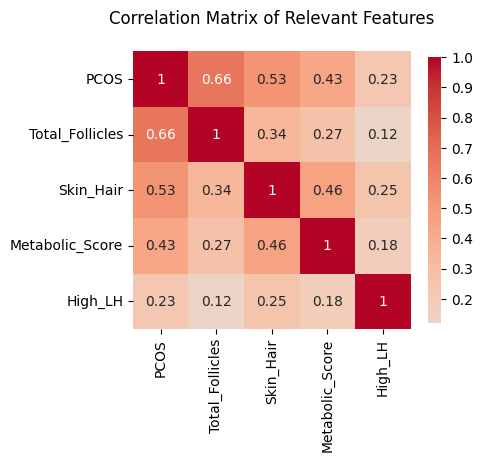

In [34]:
plt.figure(figsize = (5,5))
heatmap = sns.heatmap(corr_matrix,
                      annot=True,
                      cmap = 'coolwarm',
                      center=0,
                      square = True,
                      cbar_kws = {"shrink": .7}
                    )

plt.title('Correlation Matrix of Relevant Features', fontsize = 12, pad=20)
plt.tight_layout()
plt.show()

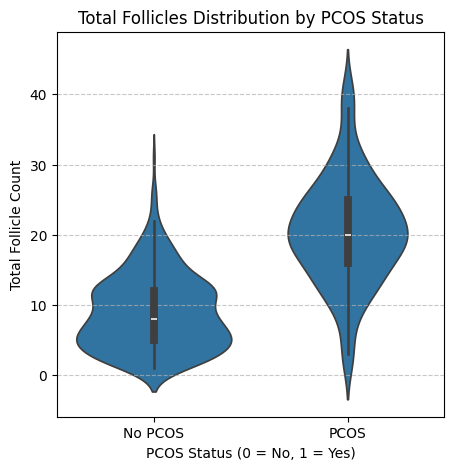

In [35]:
plt.figure(figsize=(5,5))
sns.violinplot(x='PCOS', y='Total_Follicles', data=df)
plt.title('Total Follicles Distribution by PCOS Status')
plt.xlabel('PCOS Status (0 = No, 1 = Yes)')
plt.ylabel('Total Follicle Count')
plt.xticks([0, 1], ['No PCOS', 'PCOS'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

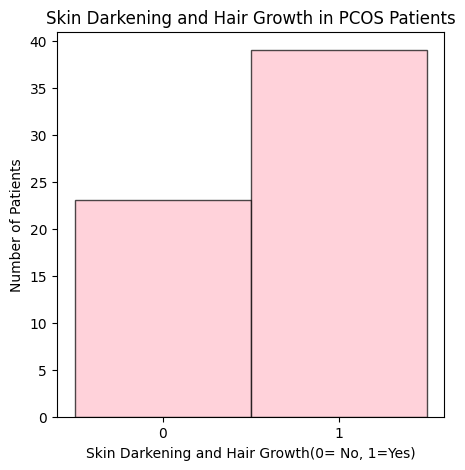

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter only PCOS patients
pcos_patients = df[df['PCOS'] == 1]

plt.figure(figsize=(5,5))
plt.hist(pcos_patients['Skin_Hair'], bins = [-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7, color='pink')
plt.title('Skin Darkening and Hair Growth in PCOS Patients')
plt.xlabel('Skin Darkening and Hair Growth(0= No, 1=Yes)')
plt.ylabel('Number of Patients')
plt.xticks([0,1])
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22712\162352232.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='Metabolic_Score', y='PCOS', data=df,


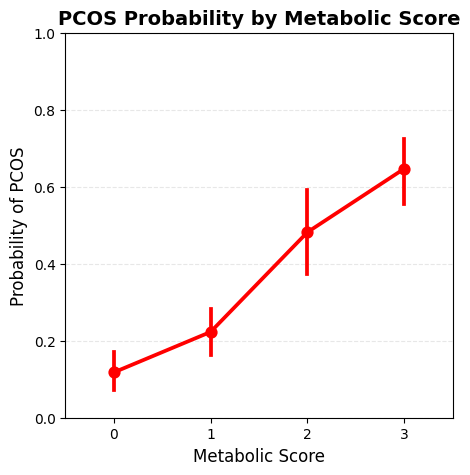

In [29]:
plt.figure(figsize=(5,5
                    ))
sns.pointplot(x='Metabolic_Score', y='PCOS', data=df, 
              ci=95, color='red', markers='o', linestyles='-')
plt.title('PCOS Probability by Metabolic Score', fontsize=14, fontweight='bold')
plt.xlabel('Metabolic Score', fontsize=12)
plt.ylabel('Probability of PCOS', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, 1)
plt.show()

In [ ]:
relevant.to_csv('relevant_data.csv', index = False)